In [1]:
# Import packages required
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets,transforms
from torch.autograd import Variable

In [2]:
transformers=transforms.Compose([
                               transforms.Resize((32, 32)),
                        transforms.ToTensor(),
                               transforms.Normalize((0.1307,), (0.3081,))])

In [3]:
def dataloader(train_bsize, test_bsize):
    train_ds=torchvision.datasets.MNIST(root='data',train=True,download=True,
                            transform=transformers)
    new_targets = torch.tensor(np.random.randint(0, 10, (len(train_ds)),))
    train_ds.targets= new_targets                                   
                                         
    train_dataloader=torch.utils.data.DataLoader(train_ds,batch_size=train_bsize, shuffle=True)
    test_dataloader=torch.utils.data.DataLoader(torchvision.datasets.MNIST(root='data',train=False,download=True,
                            transform= transformers),batch_size=test_bsize, shuffle=True)
    return (train_dataloader,test_dataloader)

In [4]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1=nn.Conv2d(1,6,5)
        self.conv2=nn.Conv2d(6,16,5)
        self.linear1=nn.Linear(16*5*5,100)
        self.linear2=nn.Linear(100,60)
        self.linear3=nn.Linear(60,10)
        
    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.size()[0], -1)
        x=self.linear1(x)
        x=F.leaky_relu(x)
        x=self.linear2(x)
        x=F.leaky_relu(x)
        x=self.linear3(x)
        return x
    

In [5]:
train_loader,test_loader=dataloader(100,100)

In [6]:
def train_model(model, train_loader):
    correct_samples = 0
    train_loss = 0
    for b_index, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()

        # Forward propagation
        pred = model(data)
        loss = Floss(pred, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.data

        pred = np.argmax(pred.data, axis=1)
        correct_samples += np.equal(pred, target.data).sum()
    
    train_loss = (train_loss ) / len(train_loader.dataset)
    acc = 100.0 * correct_samples / len(train_loader.dataset)
    return train_loss.data.numpy().tolist(), acc

In [7]:
def test_model(model, epoch, test_loader):
    model.eval()
    correct_samples = 0
    test_loss = 0

    for data, target in test_loader:
        data, target = Variable(data), Variable(target)
        pred = model(data)
        loss = Floss(pred, target)
        test_loss += loss.data

        pred = np.argmax(pred.data, axis = 1)
        correct_samples  += np.equal(pred, target.data).sum()

    # Print log
    test_loss = (test_loss ) / len(test_loader.dataset)
    print('\nTest set, Epoch {} , Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(epoch,
        test_loss, correct_samples, len(test_loader.dataset),
        100. * correct_samples / len(test_loader.dataset)))
    return test_loss.data.numpy().tolist()

In [8]:
model = CNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
train_loss_list = []
test_loss_list = []

epochs = 100
log_interval = 500
Floss = torch.nn.CrossEntropyLoss()
for epoch in range(1, epochs + 1):
    train_loss, train_acc = train_model(model, train_loader)
    train_loss_list.append(train_loss)
    test_loss = test_model(model, epoch, test_loader)
    test_loss_list.append(test_loss)
    print('Epoch: ', epoch)
    print('Train Loss= ', train_loss)
    print('Test Loss=',test_loss)

[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.



Test set, Epoch 1 , Average loss: 0.0230, Accuracy: 1496/10000 (15%)

Epoch:  1
Train Loss=  0.02303091250360012
Test Loss= 0.02296300046145916

Test set, Epoch 2 , Average loss: 0.0230, Accuracy: 2083/10000 (21%)

Epoch:  2
Train Loss=  0.02302425727248192
Test Loss= 0.02297346107661724

Test set, Epoch 3 , Average loss: 0.0230, Accuracy: 2134/10000 (21%)

Epoch:  3
Train Loss=  0.023020030930638313
Test Loss= 0.022974230349063873

Test set, Epoch 4 , Average loss: 0.0230, Accuracy: 1062/10000 (11%)

Epoch:  4
Train Loss=  0.023016052320599556
Test Loss= 0.023001618683338165

Test set, Epoch 5 , Average loss: 0.0230, Accuracy: 1577/10000 (16%)

Epoch:  5
Train Loss=  0.023011745885014534
Test Loss= 0.022963562980294228

Test set, Epoch 6 , Average loss: 0.0230, Accuracy: 1142/10000 (11%)

Epoch:  6
Train Loss=  0.023004749789834023
Test Loss= 0.02299783192574978

Test set, Epoch 7 , Average loss: 0.0230, Accuracy: 966/10000 (10%)

Epoch:  7
Train Loss=  0.02299884706735611
Test Loss=


Test set, Epoch 57 , Average loss: 0.0238, Accuracy: 1005/10000 (10%)

Epoch:  57
Train Loss=  0.021809346973896027
Test Loss= 0.023842746391892433

Test set, Epoch 58 , Average loss: 0.0240, Accuracy: 933/10000 (9%)

Epoch:  58
Train Loss=  0.021778317168354988
Test Loss= 0.023977747187018394

Test set, Epoch 59 , Average loss: 0.0244, Accuracy: 871/10000 (9%)

Epoch:  59
Train Loss=  0.021754439920186996
Test Loss= 0.02441522292792797

Test set, Epoch 60 , Average loss: 0.0241, Accuracy: 952/10000 (10%)

Epoch:  60
Train Loss=  0.021722443401813507
Test Loss= 0.02409755066037178

Test set, Epoch 61 , Average loss: 0.0241, Accuracy: 1003/10000 (10%)

Epoch:  61
Train Loss=  0.02169620618224144
Test Loss= 0.024054821580648422

Test set, Epoch 62 , Average loss: 0.0241, Accuracy: 1092/10000 (11%)

Epoch:  62
Train Loss=  0.02166607230901718
Test Loss= 0.024075033143162727

Test set, Epoch 63 , Average loss: 0.0242, Accuracy: 1033/10000 (10%)

Epoch:  63
Train Loss=  0.02163774892687797

In [9]:
print(train_loss_list)
print(test_loss_list)

[0.02303091250360012, 0.02302425727248192, 0.023020030930638313, 0.023016052320599556, 0.023011745885014534, 0.023004749789834023, 0.02299884706735611, 0.022991351783275604, 0.022983014583587646, 0.022972818464040756, 0.02296321652829647, 0.02295219898223877, 0.022938165813684464, 0.022925792261958122, 0.022909440100193024, 0.022893283516168594, 0.02287759818136692, 0.02285742573440075, 0.02283615991473198, 0.022820401936769485, 0.022797714918851852, 0.02277636155486107, 0.02275303192436695, 0.022731272503733635, 0.022705143317580223, 0.02268383465707302, 0.02266179770231247, 0.0226325411349535, 0.022609945386648178, 0.022579818964004517, 0.022556185722351074, 0.022529112175107002, 0.022500818595290184, 0.022468678653240204, 0.022444618865847588, 0.022417385131120682, 0.022387923672795296, 0.0223552118986845, 0.02233216166496277, 0.022304868325591087, 0.022270439192652702, 0.022243274375796318, 0.02221810631453991, 0.02218714728951454, 0.0221648421138525, 0.0221306923776865, 0.02209770

Text(0.5, 0, 'Epoch')

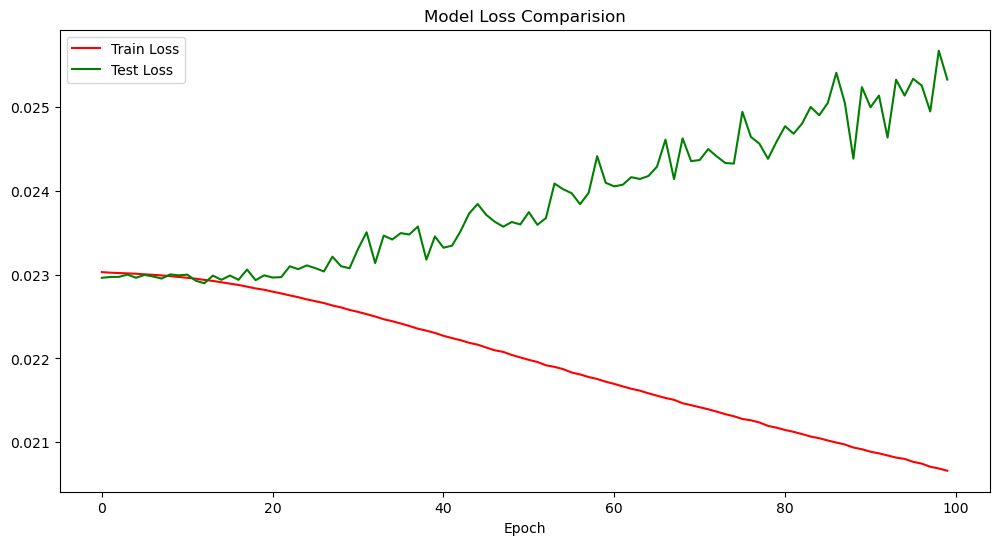

In [10]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 100, 1), train_loss_list, color = "r")
plt.plot(np.arange(0, 100, 1), test_loss_list, color = "g")
plt.title('Model Loss Comparision')
plt.legend(['Train Loss', 'Test Loss'])
plt.xlabel('Epoch')